In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import rcParams
%matplotlib inline

rcParams['figure.figsize']=10,6


In [2]:
dataset=pd.read_csv('G:\dAtAsS\AirPassengers.txt')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexed_dataset=dataset.set_index(['Month'])

In [4]:
from datetime import datetime

indexed_dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


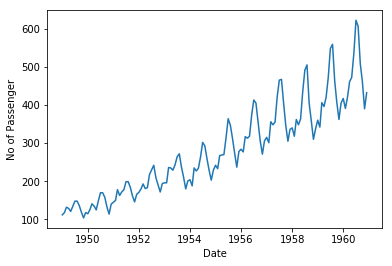

In [5]:
import matplotlib.pyplot as plt

plt.xlabel('Date')
plt.ylabel('No of Passenger')
plt.plot(indexed_dataset)

In [6]:
# Time to check STATIONARY

#determine Rolling Stastics


rolmean = indexed_dataset.rolling(window=12).mean()
rolstd = indexed_dataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

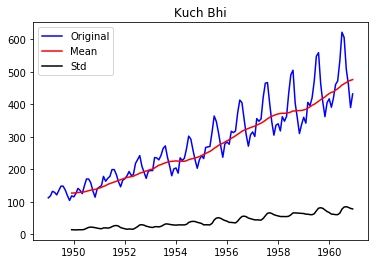

In [7]:
orig = plt.plot(indexed_dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std= plt.plot(rolstd, color='black', label='Std')

plt.legend(loc='best')
plt.title('Kuch Bhi')
plt.show(block='false')

In [8]:
# As the data is non stationary
# So now we will perform DICKEYFULLER test

from statsmodels.tsa.stattools import adfuller

print('Dickey-Fuller Test')

df_test=adfuller(indexed_dataset['#Passengers'],autolag='AIC')
df_output = pd.Series(df_test[0:4], index=['Test Statistic','P-Value',
                                          '#Lags Used','No opf observation used'])

for key,value in df_test[4].items():
    df_output['Critical values(%s)'%key]=value
    
print(df_output)


print('hello')

Dickey-Fuller Test
Test Statistic               0.815369
P-Value                      0.991880
#Lags Used                  13.000000
No opf observation used    130.000000
Critical values(1%)         -3.481682
Critical values(5%)         -2.884042
Critical values(10%)        -2.578770
dtype: float64
hello


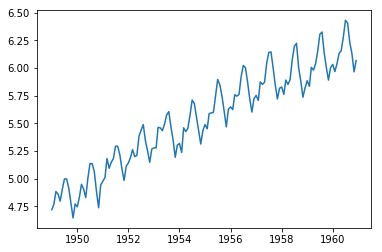

In [9]:
indexed_dataset_logscale = np.log(indexed_dataset)
plt.plot(indexed_dataset_logscale)

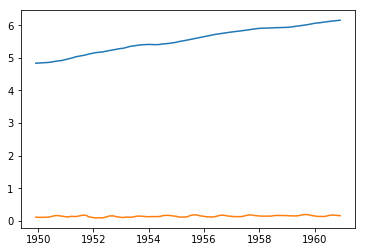

In [10]:
moving_avg=indexed_dataset_logscale.rolling(window=12).mean()
std_dev=indexed_dataset_logscale.rolling(window=12).std()
plt.plot(moving_avg)
plt.plot(std_dev)


In [42]:
datasetlogscaleMinusMovingAvg=indexed_dataset_logscale-moving_avg
datasetlogscaleMinusMovingAvg.head()
datasetlogscaleMinusMovingAvg.dropna(inplace=True)
datasetlogscaleMinusMovingAvg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [43]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(time_series):
    moving_avg=time_series.rolling(window=12).mean()
    std_dev=time_series.rolling(window=12).std()
    orig=plt.plot(time_series, c='r', label='Original')
    mean=plt.plot(moving_avg, c='b', label='Mean')
    std=plt.plot(std_dev, c='black', label='Std')
    plt.legend(loc='best')
    plt.title('Rolling MEan & STD deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test')
    
    dftest=adfuller(time_series['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','P-Value',
                                          '#Lags Used','No opf observation used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key]=value
        
    print(dfoutput)
    

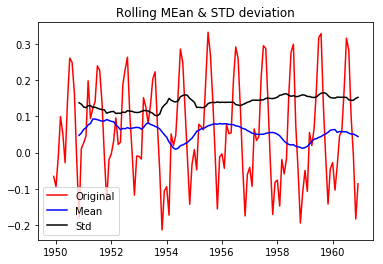

Dickey-Fuller Test
Test Statistic              -3.162908
P-Value                      0.022235
#Lags Used                  13.000000
No opf observation used    119.000000
Critical Values(1%)         -3.486535
Critical Values(5%)         -2.886151
Critical Values(10%)        -2.579896
dtype: float64


In [46]:
test_stationary(datasetlogscaleMinusMovingAvg)

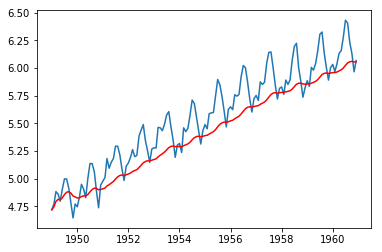

In [49]:
#weighted Average :  To see the trend present in the time series

exponentialDecayWeightedAvg=indexed_dataset_logscale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexed_dataset_logscale)
plt.plot(exponentialDecayWeightedAvg, c='r')

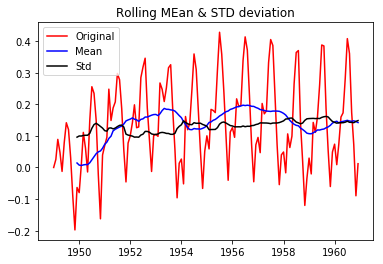

Dickey-Fuller Test
Test Statistic              -3.601262
P-Value                      0.005737
#Lags Used                  13.000000
No opf observation used    130.000000
Critical Values(1%)         -3.481682
Critical Values(5%)         -2.884042
Critical Values(10%)        -2.578770
dtype: float64


In [50]:
dataset_transform=indexed_dataset_logscale-exponentialDecayWeightedAvg
test_stationary(dataset_transform)

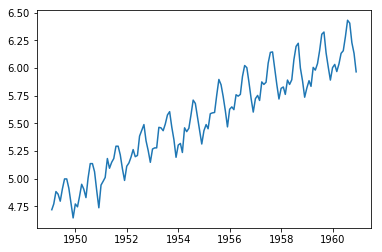

In [51]:
# Now data is stationary , so we can shift the value for forecasting

datasetLogOfShifting = indexed_dataset_logscale.shift()
plt.plot(datasetLogOfShifting)

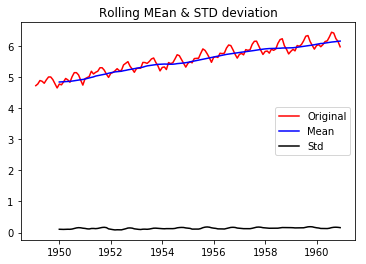

Dickey-Fuller Test
Test Statistic              -1.689021
P-Value                      0.436778
#Lags Used                  13.000000
No opf observation used    129.000000
Critical Values(1%)         -3.482088
Critical Values(5%)         -2.884219
Critical Values(10%)        -2.578864
dtype: float64


In [56]:
datasetLogOfShifting.dropna(inplace=True)
test_stationary(datasetLogOfShifting)

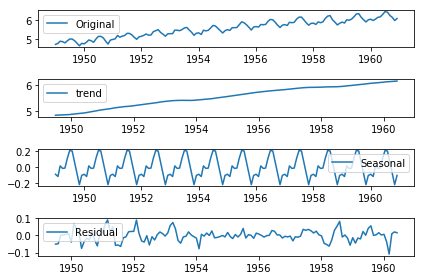

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_dataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


plt.subplot(411)
plt.plot(indexed_dataset_logscale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()




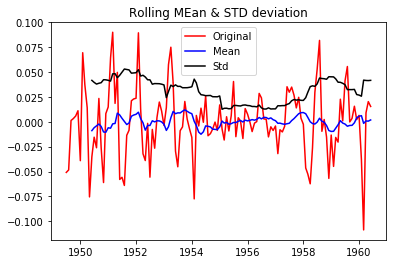

Dickey-Fuller Test
Test Statistic            -6.332387e+00
P-Value                    2.885059e-08
#Lags Used                 9.000000e+00
No opf observation used    1.220000e+02
Critical Values(1%)       -3.485122e+00
Critical Values(5%)       -2.885538e+00
Critical Values(10%)      -2.579569e+00
dtype: float64


In [64]:
decomposedLogDate=residual.dropna()

test_stationary(decomposedLogDate)

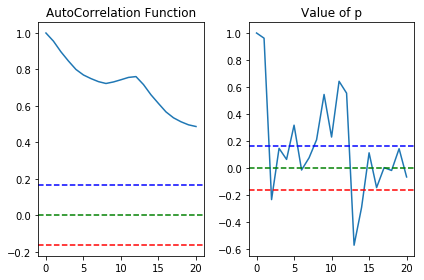

In [68]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogOfShifting, nlags=20)
lag_pacf=pacf(datasetLogOfShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf, label='asf')
plt.axhline(y=0, linestyle='--', c='g')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogOfShifting)), linestyle='--', c='r')
plt.axhline(y=1.96/np.sqrt(len(datasetLogOfShifting)), linestyle='--', c='b')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf, label='Pcaf')
plt.axhline(y=0, linestyle='--', c='g')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogOfShifting)), linestyle='--', c='r')
plt.axhline(y=1.96/np.sqrt(len(datasetLogOfShifting)), linestyle='--', c='b')
plt.title('Value of p')

plt.tight_layout()


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

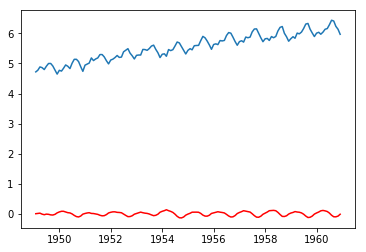

In [81]:
# ARIMA model

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexed_dataset_logscale, order=(2,1,2))
result_AR = model.fit(disp=-1)
plt.plot(datasetLogOfShifting)
plt.plot(result_AR.fittedvalues, c='r')
plt.title('RSS: %4f '%sum((result_AR.fittedvalues,datasetLogOfShifting['#Passengers'])**2))
print('Dont know what just happend')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


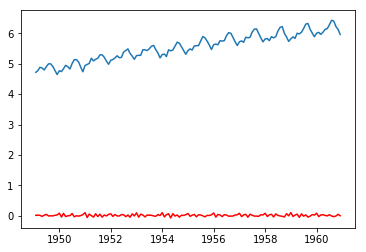

In [86]:
# Moving Average model consideration

model=ARIMA(indexed_dataset_logscale, order=(0,1,2))
result_MA=model.fit(disp=1)
plt.plot(datasetLogOfShifting)
plt.plot(result_MA.fittedvalues, c='r')




In [88]:
prediction_arima_diff=pd.Series(result_AR.fittedvalues, copy=True)
prediction_arima_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005227
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002662
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-

In [91]:
prediction_arima_diff.cumsum()
prediction_arima_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [94]:
prediction_arima_log=pd.Series(indexed_dataset_logscale['#Passengers'].ix[0],index=indexed_dataset_logscale.index)
prediction_arima_log=prediction_arima_log.add(prediction_arima_diff.cumsum(),fill_value=0)
prediction_arima_log.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

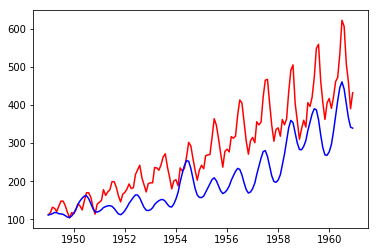

In [98]:
prediction_arima=np.exp(prediction_arima_log)
plt.plot(indexed_dataset, c='r')
plt.plot(prediction_arima, c='b')


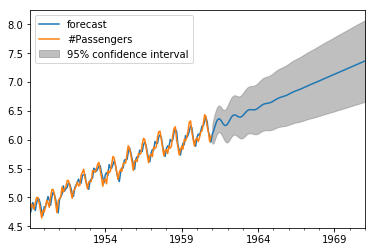

In [102]:
result_AR.plot_predict(1,264)
x=result_AR.forecast(steps=120)